# Timing of IFS

Check timing of OpenIFS

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
exps = ['FOCI_GJK001']

In [3]:
for exp in exps:
    
    statfile = '/gxfs_work1/geomar/smomw352/esm-experiments/%s/log/oifs/ifs.stat_*' % (exp,)
    statfiles = glob.glob(statfile)
    
    startyears = np.array([])
    starttime_list = []
    dyears = np.array([])
    totmins = np.array([])
    
    for file in statfiles:
        startyear = int(file[-17:-13])
        endyear = int(file[-8:-4])
        dyear = endyear - startyear + 1
        
        f = open(file)
        lines = f.readlines()
        starttime = lines[0].split()[0]
        starttime_list.append(starttime)
        totmin = float(lines[-1].split()[7][0:3])
        
        startyears = np.append(startyears,startyear)
        dyears = np.append(dyears,dyear)
        totmins = np.append(totmins,totmin)
    
    starttimes = pd.to_datetime(starttime_list)

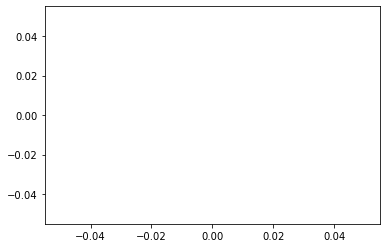

In [4]:
plt.scatter(startyears[dyears==5],totmins[dyears==5])

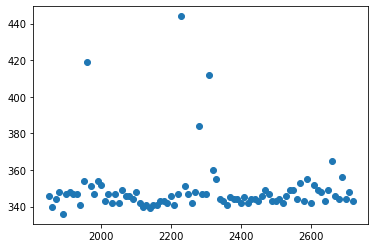

In [5]:
plt.scatter(startyears[dyears==10],totmins[dyears==10])

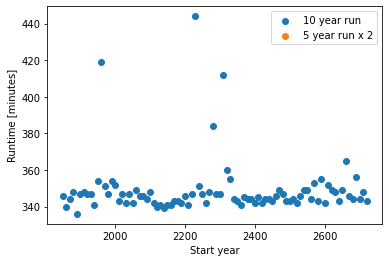

In [6]:
fig, ax = plt.subplots(1,1)
ax.scatter(startyears[dyears==10],totmins[dyears==10],label='10 year run')
ax.scatter(startyears[dyears==5],totmins[dyears==5]*2, label='5 year run x 2')
ax.legend()
ax.set_xlabel('Start year')
ax.set_ylabel('Runtime [minutes]')
fig.savefig('runtimes.pdf')

Text(0.5, 0, 'Start year')

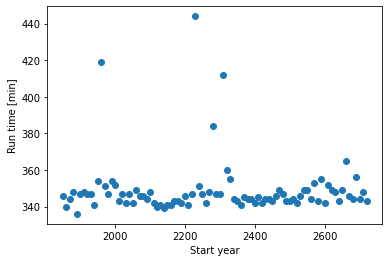

In [9]:
fig, ax = plt.subplots(1,1)
ax.scatter(startyears[dyears==10],totmins[dyears==10])
ax.set_ylabel('Run time [min]')
ax.set_xlabel('Start year')

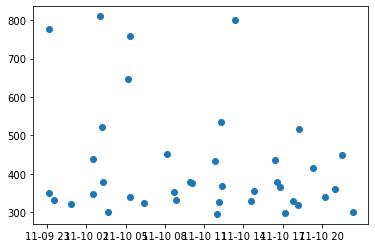

In [30]:
plt.scatter(starttimes[dyears==5],totmins[dyears==5])